In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [2]:
# Load the Iris dataset from scikit-learn
iris = load_iris()

In [3]:
# Create a DataFrame from the Iris dataset
iris_df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])

In [4]:
# Assuming 'petal length (cm)' and 'sepal length (cm)' as features and 'target' as the species
X = iris_df[['petal length (cm)', 'sepal length (cm)']]
y = iris_df['target']



In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [11]:
# Plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\sk753\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


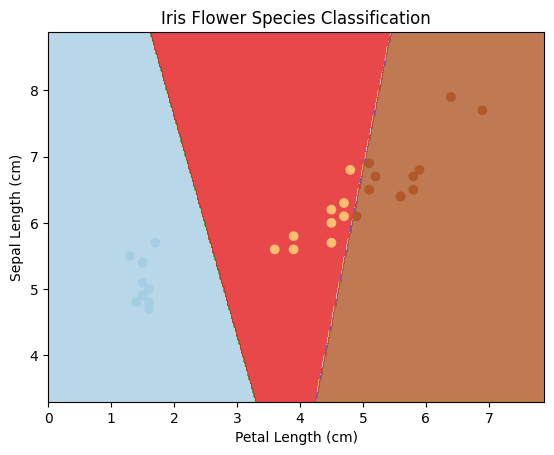

In [9]:
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Iris Flower Species Classification')
plt.show()
